In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plan
## Vad behöver göras för att städa upp datan?
- Kolla de grundläggande delarna:
    - shape : (53940, 10)
    - datatyper:
        - Inga null-värden
        - cut, color och clarity är str - Behöver omvandla till numeriska värden.
        - I övrigt ser datatyper ok ut.
    - null-värden: inga men vet att det finns nollvärden i x, y och z
    - deskriptiv statistik
    - dubletter:
        - Av alla är finns det 146 dubletter
        - När x, y och z är borttagna är det 803 dubletter
    - spridning av kolumner:
        - Datan behöver normaliseras så att de kan jämföras. Price har värden upp till över 15 000 medan högstavärdet på carat är 5.
    - korrelationsmatris för numeriska kolumner
- Kolla orimliga värden
    - Finns det värden som inte stämmer överens med x, y och z:
        - depth
        - ~~carat~~
        - table
    - Hur påverkar de övriga värdena price?
        - carat
        - cut
        - color
        - clarity
        - depth
        - table
- ~~Kolla spridningsmåttet~~ Gammal
- ~~Kolla tomma värden~~ Gammal
- ~~Kolla 0-värden och hur de påverkar~~ Gammal
- ~~Förstå de olika kolumnerna~~ Gammal
- Eventuellt ändra om strängar till numeriska värden för att få tydligare data
- Utvärdera vilka kolumner som är viktiga för priset.

## Allmän förståelse om diamanter
- Priset är i dollar. Finns det några nollvärden?
- Carat är vikten av en diamant, som är fördefinierad
- Cut är hur diamanten är skuren och har värdena Fair, Good, Very Good, Premium and Ideal, vilket har att göra med hur ljuset reflekteras från table.
- Color är diamantens färg och går från D (bäst) till J (sämst)
- Clarity är hur klar diamanten är och har följande värden från sämst till bäst: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
- Total Depth, totalt djup och beräknas enligt $2 \cdot \frac{z}{(x + y)}$
- Table är toppen på diamanten: bredden i förhållande till dess vidaste punkt --> procenten som utgörs av table, behöver inte vara den största som är bäst och beror på dess form.
- x är längden i mm
- y är bredden i mm
- z är höjden i mm

## Saknad data
- Jag vet inte vilket typ av slipning det är på diamanterna bara vilken kvalitet slipningen har. Är det en eller olika? Hur kan jag ta reda på detta?

Källor: 
- https://www.diamonds.pro/education/diamond-depth-and-table/
- https://niceice.com/diamond-table-percentage-how-to-calculate-proportions/

## Annan data att ta i beaktan
### carat i förhållande till depth och diameter
Carat Weight	Approximate Diameter (mm)	Approximate Depth (mm)
0.25 ct	4.1 mm	2.5 mm
0.50 ct	5.2 mm	3.2 mm
0.75 ct	5.8 mm	3.5 mm
1.00 ct	6.5 mm	3.9 mm
1.50 ct	7.4 mm	4.5 mm
2.00 ct	8.2 mm	5.0 mm
3.00 ct	9.3 mm	5.7 mm
4.00 ct	10.2 mm	6.2 mm
5.00 ct	11.0 mm	6.7 mm

### Beräkna carat beroende på x, y, z
- För rund: ((x + y)/2)² × z × 0.0061
- För övriga: x × y × z × 0.0062

Jag har iaf något att utgå ifrån och se om det är något värde som avviker.



In [3]:
df = pd.read_csv("data/diamonds.csv")
print(df)
#Using Datawrangler to get a sense of the data

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


## Shape

In [38]:
df.shape

(53940, 10)

# Datatyper

In [39]:
df.info()
#df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Sammanfattning
- Inga null-värden
- cut, color och clarity är str - Behöver omvandla till numeriska värden.
- I övrigt ser datatyper ok ut.

## Deskriptiv statistik

In [40]:
print("\nSummary statistics:")
print(df.describe(include='all').T)


Summary statistics:
           count unique    top   freq         mean          std    min    25%  \
carat    53940.0    NaN    NaN    NaN      0.79794     0.474011    0.2    0.4   
cut        53940      5  Ideal  21551          NaN          NaN    NaN    NaN   
color      53940      7      G  11292          NaN          NaN    NaN    NaN   
clarity    53940      8    SI1  13065          NaN          NaN    NaN    NaN   
depth    53940.0    NaN    NaN    NaN    61.749405     1.432621   43.0   61.0   
table    53940.0    NaN    NaN    NaN    57.457184     2.234491   43.0   56.0   
price    53940.0    NaN    NaN    NaN  3932.799722  3989.439738  326.0  950.0   
x        53940.0    NaN    NaN    NaN     5.731157     1.121761    0.0   4.71   
y        53940.0    NaN    NaN    NaN     5.734526     1.142135    0.0   4.72   
z        53940.0    NaN    NaN    NaN     3.538734     0.705699    0.0   2.91   

            50%      75%      max  
carat       0.7     1.04     5.01  
cut         NaN

### Sammanfattning
- Minimumvärden på x, y och z på 0 som behöver plockas bort
- Hur ska jag standardisera (normalisera) värdena för jämförelse?
- price är target

## Dubletter

In [4]:
duplicate_indices_full = []

duplicated_rows = df.duplicated(keep='first')

for idx, is_duplicate in enumerate(duplicated_rows):
    if is_duplicate:
        duplicate_indices_full.append(idx)
        
print(f"Found {len(duplicate_indices_full)} duplicate rows")
print(f"Duplicate row indices: {duplicate_indices_full}")


duplicate_indices_without_x_y_z = []

duplicated_rows = df.duplicated(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table'], keep='first')

for idx, is_duplicate in enumerate(duplicated_rows):
    if is_duplicate:
        duplicate_indices_without_x_y_z.append(idx)

print(f"Found {len(duplicate_indices_without_x_y_z)} duplicate rows without x, y and z")
print(f"Duplicate row indices: {duplicate_indices_without_x_y_z} without x, y and z")
    

Found 146 duplicate rows
Duplicate row indices: [1005, 1006, 1007, 1008, 2025, 2183, 2820, 3156, 3704, 3981, 4386, 4493, 4520, 5175, 5665, 6337, 7711, 7744, 8331, 8601, 9196, 9593, 10180, 10363, 10472, 11009, 11243, 11315, 12266, 12293, 12644, 13860, 14002, 14922, 15012, 15317, 15455, 16269, 17138, 17555, 18689, 19676, 20629, 21047, 21602, 21783, 22146, 22148, 22375, 22392, 22809, 22852, 23329, 23735, 23979, 24161, 24863, 25339, 25942, 26071, 26415, 26554, 26608, 27027, 27047, 27516, 27518, 27764, 28080, 28116, 28325, 28341, 28593, 29029, 29508, 29591, 29657, 29802, 30163, 30392, 30513, 30577, 30668, 30885, 31253, 31324, 31627, 31629, 32250, 32651, 33034, 33381, 33423, 33808, 34064, 34159, 34180, 34422, 34530, 34663, 35449, 35569, 36447, 36479, 36547, 36652, 36866, 37175, 37377, 37497, 37498, 37744, 37997, 38390, 38507, 38573, 38636, 38729, 38867, 38923, 39058, 39129, 39235, 39360, 39443, 39512, 40096, 40464, 41124, 41676, 41798, 42111, 42983, 43261, 43425, 43500, 43570, 46568, 46648, 

### Sammanfattning
- totalt finns 146 rader som har exakt samma värden i samtliga columner. Ta bort!
- Om man istället tittar på dubletter utan x, y och z är det 803 dubletter. Ev. ta bort om jag inte ska använda x, y och z

## Spridning av kolumnerna

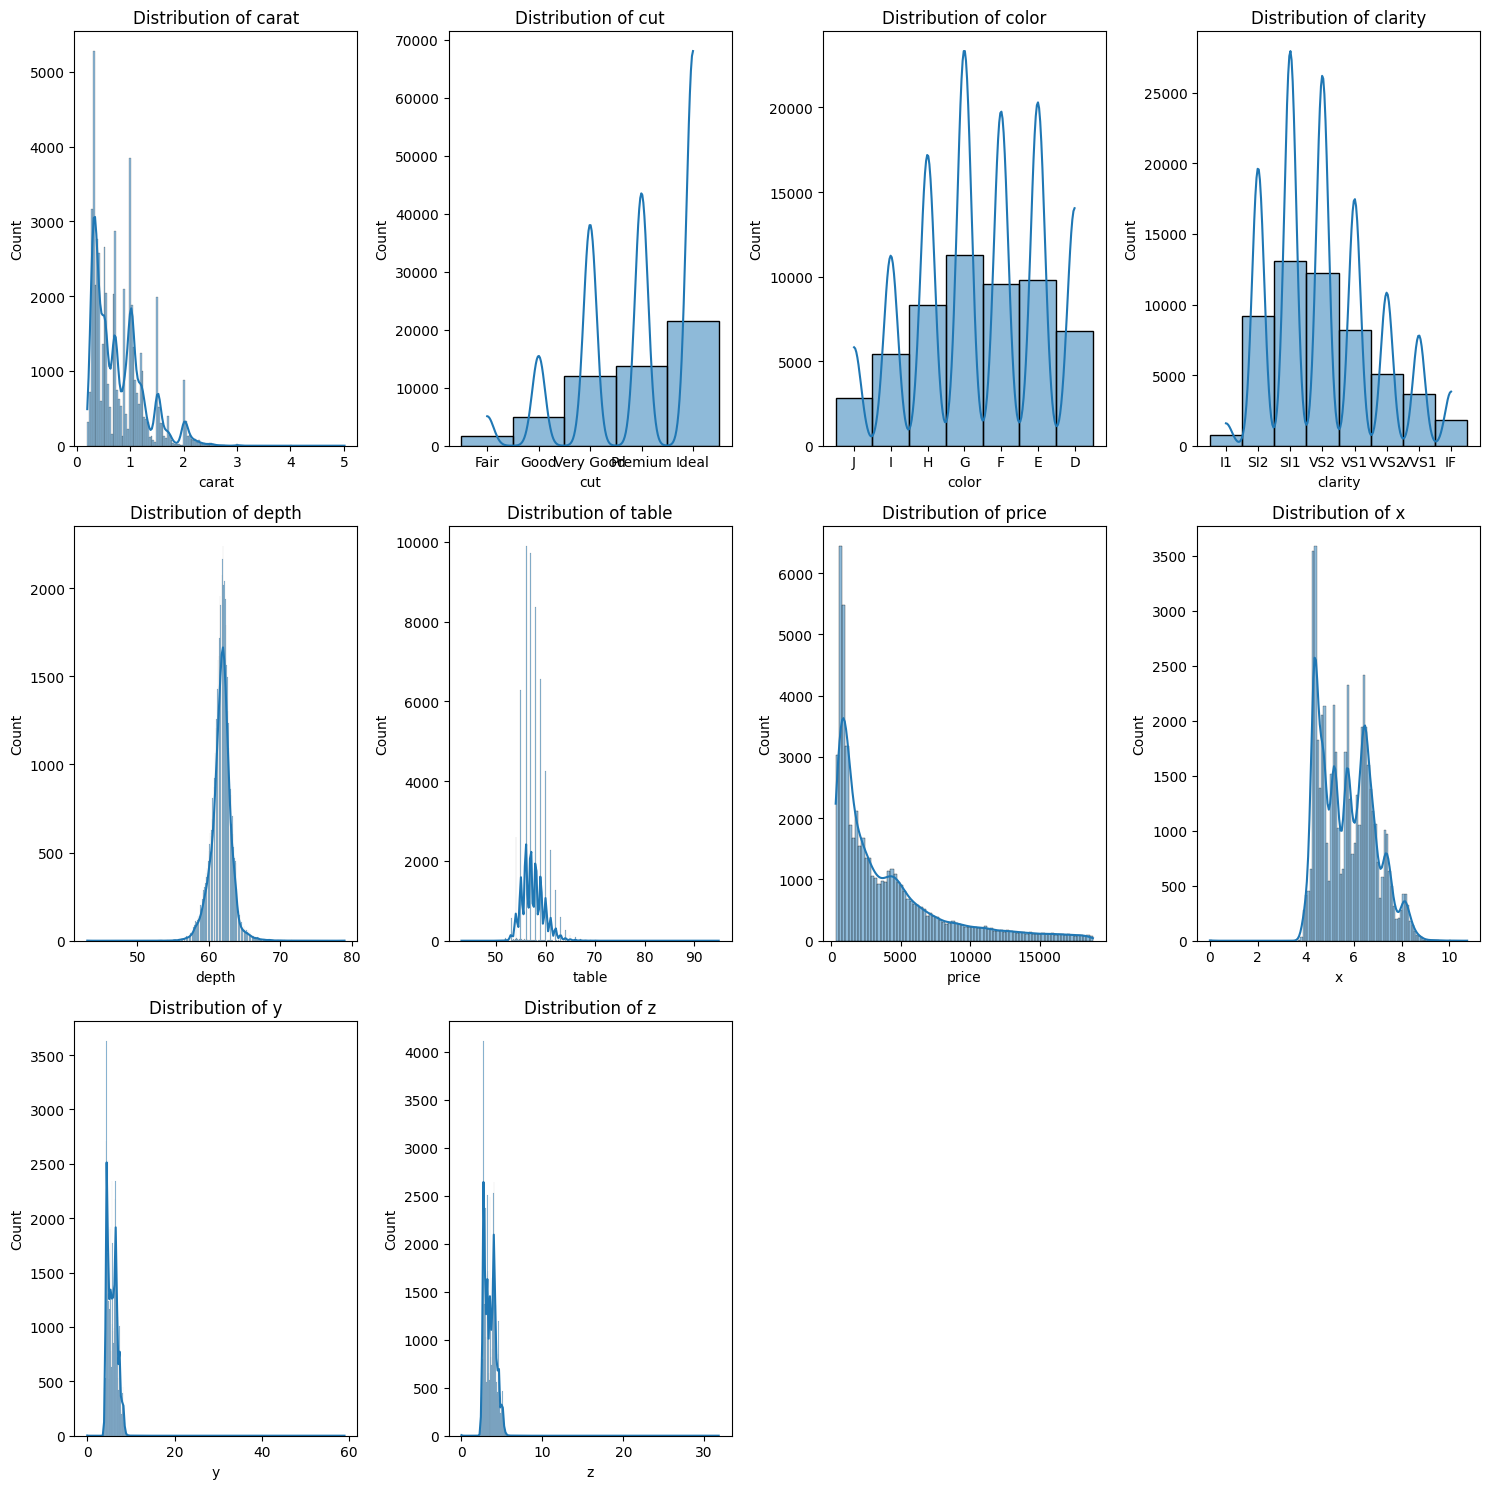

In [5]:
plt.figure(figsize=(15, 15))
columns = min(4, len(df.columns))
rows = (len(df.columns) + columns -1) //columns

# Ändra object-datatyp till categorical
df['cut'] = pd.Categorical(df.cut, ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)
df['color'] = pd.Categorical(df.color, ['J', 'I', 'H', 'G', 'F', 'E', 'D'], ordered=True)

# clarity är extra viktig för den är fel. Ska vara enligt: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
df['clarity'] = pd.Categorical(df.clarity, ["I1", "SI2", "SI1", "VS2", "VS1",
"VVS2", "VVS1", "IF"], ordered=True)


for i, column in enumerate(df.select_dtypes(include=['number', 'category']).columns):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
    
plt.show()

### Sammanfattning
- Kategorierna i clarity var i fel ordning

## Korrelationsmatris för numeriska värden

In [1]:
# Med X, y och z
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['number']).corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


KeyboardInterrupt



### Utan x, y och z men inkluderat kategoriska kolumner

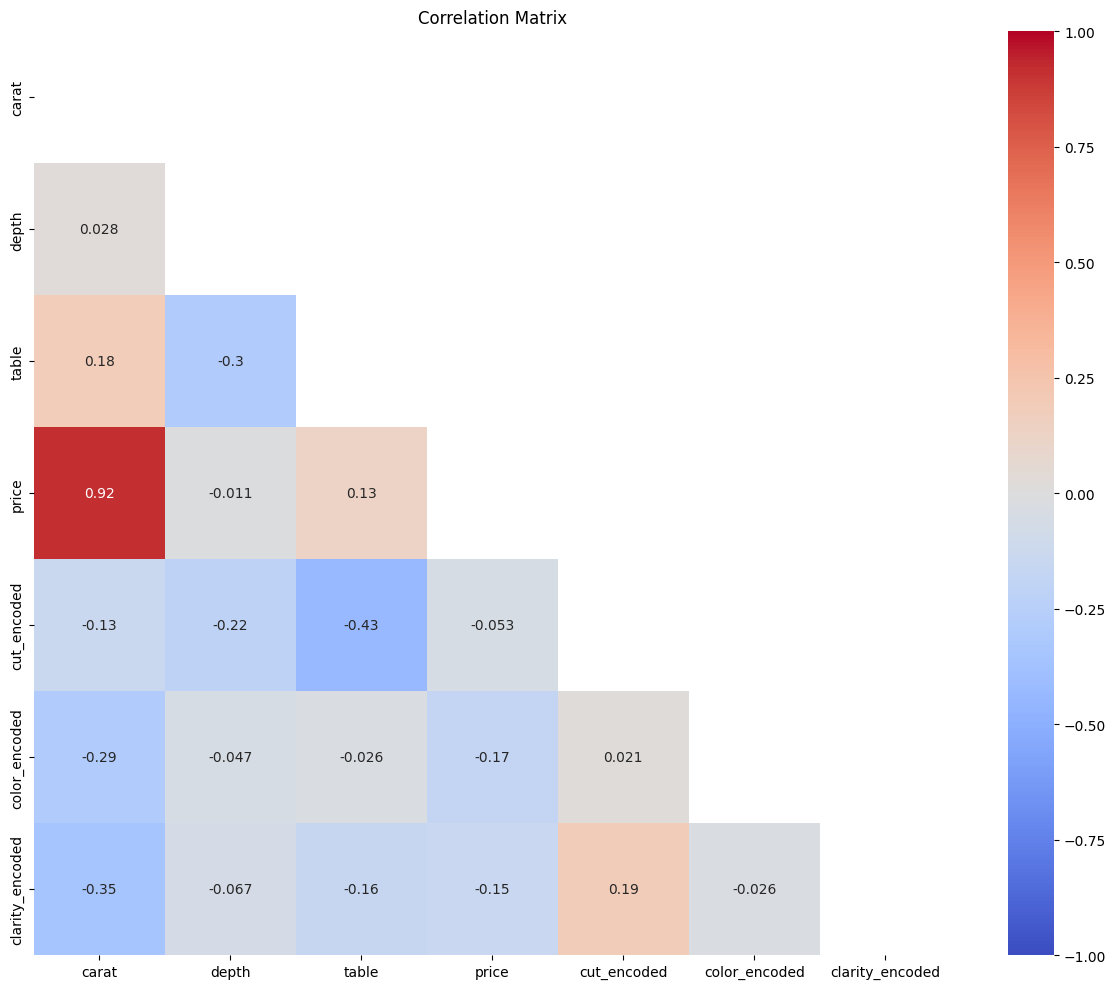

In [15]:
df_without_x_y_z = df.copy()
df_without_x_y_z = df_without_x_y_z.drop(['x', 'y', 'z'], axis=1)

# lägg till encoded kolumner för varje category som sedan hämtas in i plotten
df_without_x_y_z['cut_encoded'] = df_without_x_y_z.cut.cat.codes
df_without_x_y_z['color_encoded'] = df_without_x_y_z.color.cat.codes
df_without_x_y_z['clarity_encoded'] = df_without_x_y_z.clarity.cat.codes

# Normalisera datan för korrelation
normalized_df_without_x_y_z = df_without_x_y_z.copy()
normalized_df_without_x_y_z = normalized_df_without_x_y_z.drop(['cut', 'color', 'clarity'], axis=1)

# print(normalized_df_without_x_y_z)
for col in normalized_df_without_x_y_z:
    normalized_df_without_x_y_z[col] = (normalized_df_without_x_y_z[col] - normalized_df_without_x_y_z[col].min()) / (normalized_df_without_x_y_z[col].max() - normalized_df_without_x_y_z[col].min())
# print(normalized_df_without_x_y_z)

plt.figure(figsize=(12, 10))
correlation = normalized_df_without_x_y_z.select_dtypes(include=['number']).corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Sammanfattning
- Det var väntat att price och carat skulle ha ett starkt samband men det verkar märkligt att både clarity, color och cut har en negativ korrelation.
- Får testa att sortera diamanterna utifrån carat-grupper

## Kollar på shape, andel som kan anses runda med felmarginal om 2 procent

In [25]:
round_diamonds_within_margin = []
round_diamonds_outside_margin =[]
error_margin = 0.01

for index, row in df.iterrows():
    x = row['x']
    y = row['y']
    z = row['z']
    actual_carat = row['carat']
    
    if abs(x - y) <= 0.02 * ((x + y)/2):
        round_diamonds_within_margin.append(index)
    else:
        round_diamonds_outside_margin.append(index)
        
print(f"Within margin: {len(round_diamonds_within_margin)}")
print(f"Outside margin: {len(round_diamonds_outside_margin)}")

Within margin: 53157
Outside margin: 783


## Kollar spridning - gammal

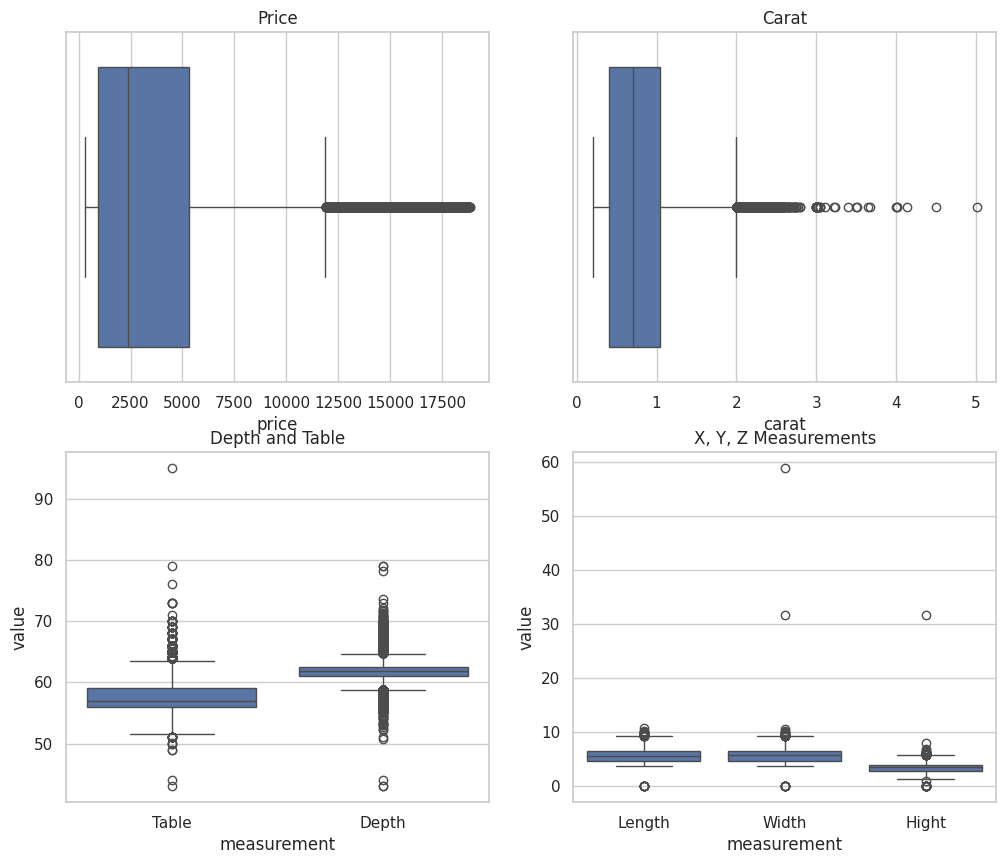

In [ ]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df["price"], ax=axs[0, 0])
axs[0, 0].set_title("Price")

sns.boxplot(x=df["carat"], ax=axs[0, 1])
axs[0, 1].set_title("Carat")

depth_table_df = pd.DataFrame({
    'Table': df['table'],
    'Depth': df['depth']
})
depth_table_melted = pd.melt(depth_table_df, var_name='measurement', value_name='value')
sns.boxplot(
    x='measurement',
    y='value',
    data=depth_table_melted, 
    ax=axs[1, 0]
    )
axs[1, 0].set_title("Depth and Table")

xyz_df = pd.DataFrame({
    'Length': df['x'],
    'Width': df['y'],
    'Hight': df['z']
})
xyz_melted = pd.melt(xyz_df, var_name='measurement', value_name='value')
sns.boxplot(
    x="measurement",
    y="value",
    data=xyz_melted,
    ax=axs[1, 1]
)
axs[1, 1].set_title("X, Y, Z Measurements")

plt.tight_layout()

plt.show()

- Price: Flera extremvärden men ser inte något som kommer påverka tolkningen av data eller något som behöver städas
- Carat: Flera extremvärden men förväntade mig att ett mindre antal skulle vara stora eller mindre med 0.2 som minsta värde.
- Table: Några extremvärden. Den över 90 är intressant att kolla vidare på i förhållande till måtten. Ideal verkar vara mellan 55-59.
- Depth: Ett fåtal extremvärden, kan vara värt att titta på dessa i förhållande till mätvärdena.
- x (length): några nollvärden som behöver städas. En diamant kan inte ha ett nollvärde. 
- y (width): några nollvärden som behöer städas. En diamant kan inte ha ett nollvärde. Kolla lite mer på de två extremvärdena och se om de kan behöva städas.
- z (hight): några nollvärden som behöver städas. En diamant kan inte ha ett nållvärde. Kolla lite mer på extremvärdet och se om den behöver städas.

## Kolla tomma värden och nollvärden - Gammal

In [85]:
df = df[(df != 0).all(axis=1)] #Tar bort rader med värde 0 i en eller flera celler
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]


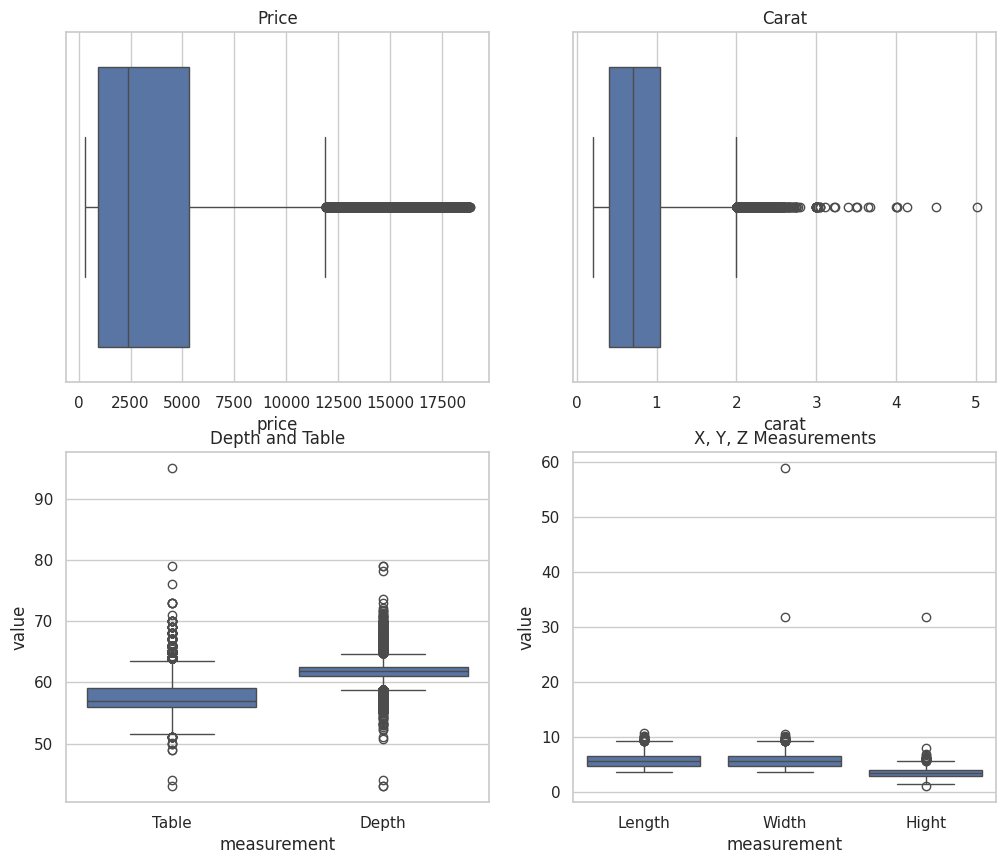

In [86]:
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df["price"], ax=axs[0, 0])
axs[0, 0].set_title("Price")

sns.boxplot(x=df["carat"], ax=axs[0, 1])
axs[0, 1].set_title("Carat")

depth_table_df = pd.DataFrame({
    'Table': df['table'],
    'Depth': df['depth']
})
depth_table_melted = pd.melt(depth_table_df, var_name='measurement', value_name='value')
sns.boxplot(
    x='measurement',
    y='value',
    data=depth_table_melted, 
    ax=axs[1, 0]
    )
axs[1, 0].set_title("Depth and Table")

xyz_df = pd.DataFrame({
    'Length': df['x'],
    'Width': df['y'],
    'Hight': df['z']
})
xyz_melted = pd.melt(xyz_df, var_name='measurement', value_name='value')
sns.boxplot(
    x="measurement",
    y="value",
    data=xyz_melted,
    ax=axs[1, 1]
)
axs[1, 1].set_title("X, Y, Z Measurements")

plt.tight_layout

plt.show()

## Kollar tillförlitligheten av carat i förhållande till x, y och z - Gammal


In [87]:
#- För rund: ((x + y)/2)² × z × 0.0061 med 2 % felmarginal
#- För övriga: x × y × z × 0.0062
diamonds_with_correct_carat = []
diamonds_with_incorrect_carat =[]
error_margin = 0.01

for index, row in df.iterrows():
    x = row['x']
    y = row['y']
    z = row['z']
    actual_carat = row['carat']
    
    if abs(x - y) <= 0.02 * ((x + y)/2):
        recalculated_carat = ((x + y)/2)**2 * z * 0.0061
        
        relative_error = abs(recalculated_carat - actual_carat) /actual_carat
        
        if relative_error <= error_margin:
            diamonds_with_correct_carat.append(index)
        else:
            diamonds_with_incorrect_carat.append(index)
    else:
        recalculated_carat = x * y * z * 0.0062
        
        relative_error = abs(recalculated_carat - actual_carat) /actual_carat
        
        if relative_error <= error_margin:
            diamonds_with_correct_carat.append(index)
        else:
            diamonds_with_incorrect_carat.append(index)
            
print(f"Diamanter med korrekt beräknad carat: {len(diamonds_with_correct_carat)}")
print(f"Diamanter med inkorrekt beräknad carat: {len(diamonds_with_incorrect_carat)}")


print(diamonds_with_incorrect_carat)


Diamanter med korrekt beräknad carat: 23534
Diamanter med inkorrekt beräknad carat: 30386
[0, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 19, 24, 25, 26, 29, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 47, 49, 52, 53, 54, 56, 57, 58, 61, 62, 63, 70, 72, 73, 75, 76, 77, 78, 80, 82, 84, 85, 86, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 101, 103, 104, 106, 108, 109, 111, 112, 113, 117, 122, 123, 125, 126, 127, 128, 129, 132, 133, 136, 137, 141, 143, 145, 146, 148, 150, 152, 154, 155, 157, 158, 159, 160, 163, 165, 166, 167, 169, 172, 174, 175, 177, 180, 182, 187, 188, 189, 190, 192, 194, 195, 196, 197, 200, 201, 203, 204, 205, 206, 207, 210, 212, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 227, 232, 236, 238, 239, 240, 241, 242, 243, 245, 246, 249, 251, 252, 259, 260, 263, 267, 268, 270, 276, 277, 278, 279, 280, 282, 283, 284, 286, 287, 290, 291, 293, 294, 296, 297, 298, 299, 301, 303, 305, 306, 310, 311, 314, 317, 318, 319, 320, 321, 322, 323, 326, 328, 329, 332, 333, 334, 335, 336, 339

[24067, 48410, 49189]


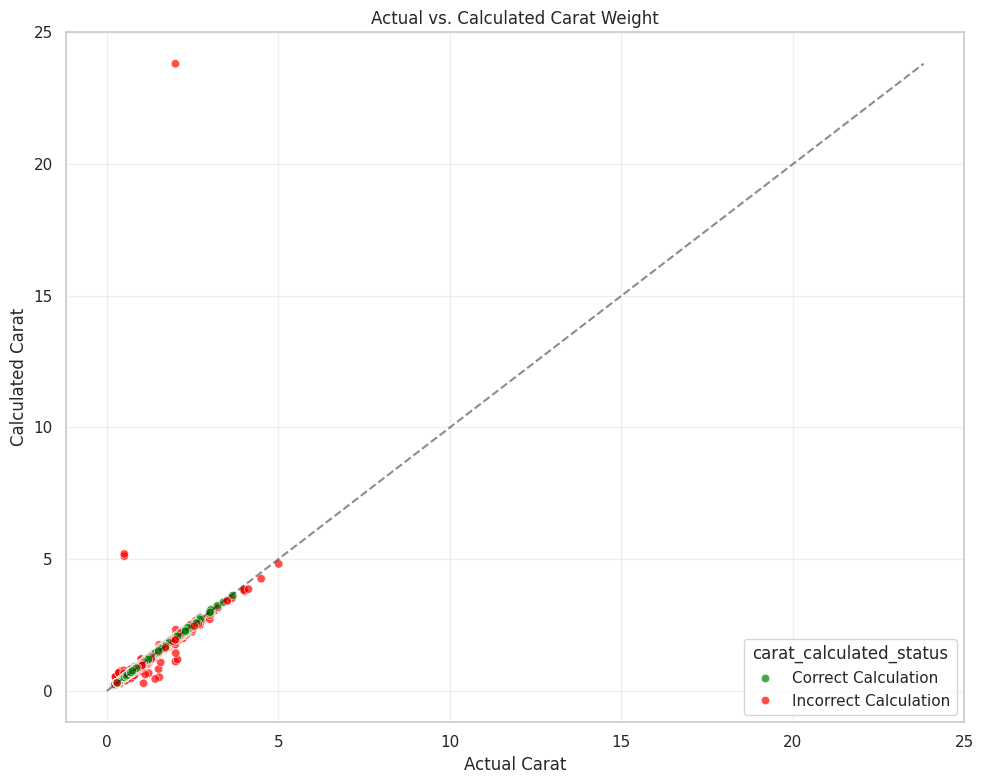

In [88]:
#Jämförelse mellan värde i dataframe och beräknat värde
df['calculated_carat'] = np.nan
df['is_correct_carat'] = False

extreme_errors = []

for index, row in df.iterrows():
    x, y, z = row['x'], row['y'], row['z']
    actual_carat = row['carat']
    
    if abs(x - y) <= 0.02 * (x + y / 2):
        calculated = ((x + y) / 2)**2 * z * 0.0061
    else:
        calculated = x * y * z * 0.0062
        
    df.at[index, 'calculated_carat'] = calculated
    df.at[index, 'is_correct_carat'] = (abs(calculated - actual_carat) / actual_carat <= 0.02)
    if abs(calculated - actual_carat) / actual_carat > 2:
        extreme_errors.append(index)
        
df['carat_calculated_status'] = df['is_correct_carat'].map({True: 'Correct Calculation', False: 'Incorrect Calculation'})
    
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='carat',
    y='calculated_carat',
    hue='carat_calculated_status',
    palette={'Correct Calculation': 'green', 'Incorrect Calculation': 'red'},
    alpha=0.7
)    

max_val = max(df['carat'].max(), df['calculated_carat'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5)

plt.title('Actual vs. Calculated Carat Weight')
plt.xlabel('Actual Carat')
plt.ylabel('Calculated Carat')
plt.grid(True, alpha=0.3)
plt.tight_layout()
print(extreme_errors)
plt.show()

In [89]:
# tre extemvärden är identiferade och behöver rensas, för det är inte rimligt att de har respektive mätvärden och den angivna carat.
""" print(df.loc[24067])
print(df.loc[48410])
print(df.loc[49189]) """

df = df.drop(labels=[24067, 48410, 49189], axis=0, errors='raise')
sorted_df = df.sort_values(by='y', ascending=False)
print(sorted_df)

       carat        cut color clarity  depth  table  price      x      y  \
27415   5.01       Fair     J      I1   65.5   59.0  18018  10.74  10.54   
27630   4.50       Fair     J      I1   65.8   58.0  18531  10.23  10.16   
25998   4.01    Premium     I      I1   61.0   61.0  15223  10.14  10.10   
25999   4.01    Premium     J      I1   62.5   62.0  15223  10.02   9.94   
26444   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   9.94   
...      ...        ...   ...     ...    ...    ...    ...    ...    ...   
31599   0.20      Ideal     E     VS2   62.2   57.0    367   3.76   3.73   
31601   0.20    Premium     D     VS2   61.7   60.0    367   3.77   3.72   
31598   0.20  Very Good     E     VS2   63.4   59.0    367   3.74   3.71   
31596   0.20    Premium     F     VS2   62.6   59.0    367   3.73   3.71   
31600   0.20    Premium     D     VS2   62.3   60.0    367   3.73   3.68   

          z  calculated_carat  is_correct_carat carat_calculated_status  
27415  6.98  

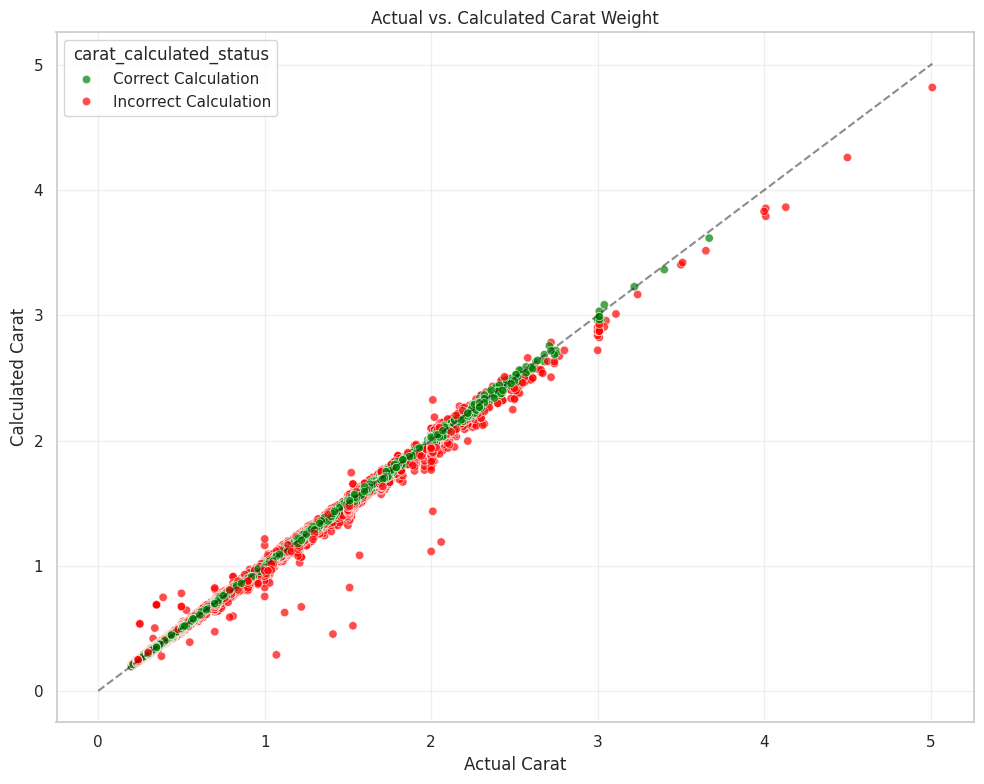

In [91]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='carat',
    y='calculated_carat',
    hue='carat_calculated_status',
    palette={'Correct Calculation': 'green', 'Incorrect Calculation': 'red'},
    alpha=0.7
)    

max_val = max(df['carat'].max(), df['calculated_carat'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5)

plt.title('Actual vs. Calculated Carat Weight')
plt.xlabel('Actual Carat')
plt.ylabel('Calculated Carat')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Kollar table i förhållande till x och y - Gammal

Kommer inte att kunna få fram något just nu i förhållande till table, eftersom det är procentuellt i förhållande till yttermåtten.

## Kollar Total depth i förhållande till x, y och z - Gammal

[14635, 20694, 21654, 49905]


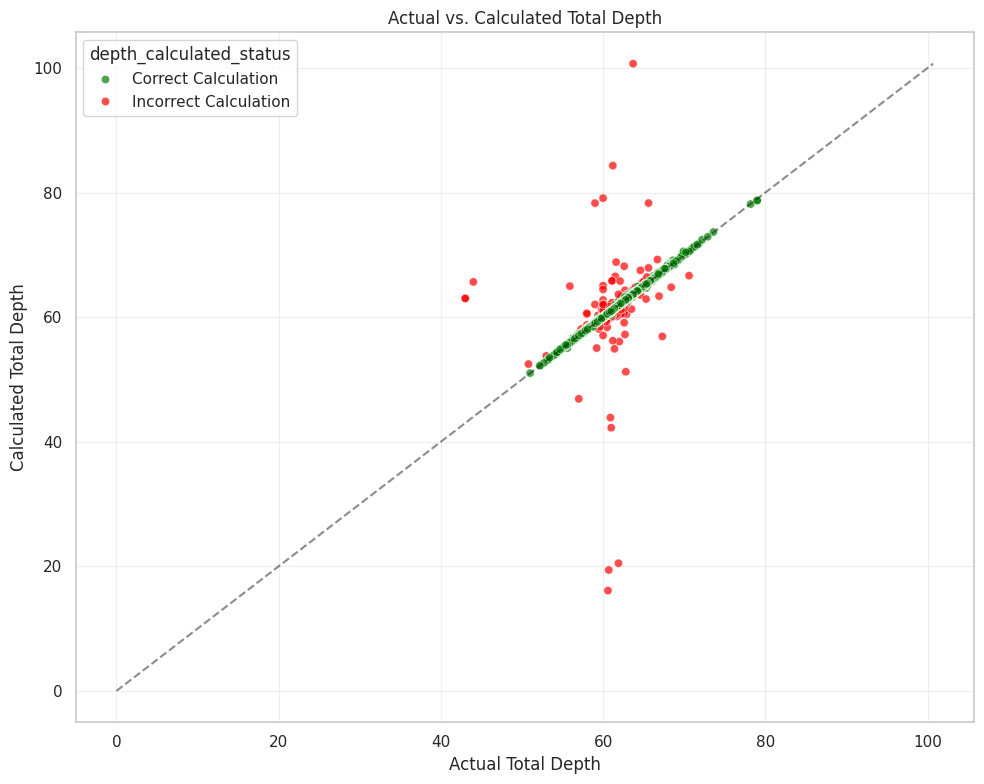

In [ ]:
# 2*z/(x+y)
df['calculated_total_depth'] = np.nan
df['is_correct_depth'] = False

extreme_errors = []

for index, row in df.iterrows():
    x, y, z = row['x'], row['y'], row['z']
    actual_depth = row['depth']
    
    calculated = 2 * z / (x + y) * 100
        
    df.at[index, 'calculated_total_depth'] = calculated
    df.at[index, 'is_correct_depth'] = (abs(calculated - actual_depth) / actual_depth <= 0.01)
    if abs(calculated - actual_depth) / actual_depth > 0.5:
        extreme_errors.append(index)
        
df['depth_calculated_status'] = df['is_correct_depth'].map({True: 'Correct Calculation', False: 'Incorrect Calculation'})
    
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x='depth',
    y='calculated_total_depth',
    hue='depth_calculated_status',
    palette={'Correct Calculation': 'green', 'Incorrect Calculation': 'red'},
    alpha=0.7
)    

max_val = max(df['depth'].max(), df['calculated_total_depth'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5)

plt.title('Actual vs. Calculated Total Depth')
plt.xlabel('Actual Total Depth')
plt.ylabel('Calculated Total Depth')
plt.grid(True, alpha=0.3)
plt.tight_layout()
print(extreme_errors)
plt.show()

In [93]:
print(df)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       calculated_carat  is_correct_car